# Final Project

## Introduction
blabla  




## Algorithm Implementation
In this part we will describe the Huffman and LZ77 algorithms implemented from scratch for the task.
### Huffman
We implemented an huffman algorithm with python.  
our implementation includes a very simple dictionary transmition where for each entry we transmit character, number of code bits and the the code itself. We know there are better ways to transmit a dictionary such "cannonical Huffman code" but decided to focus on other aspects due schedule limitations.

In [369]:
from collections import Counter
import pandas as pd
import heapq

class Huffman(object):
    
    CODE_LENGTH_BITS = 8
    HEADER = ['uncompressed[b]', 'compressed(without code)[b]', 'dictionary[b]', 'neto ratio[b]', 'total ratio[b]']
    
    def __init__(self, stop_chars = []):
        self.stop_chars = stop_chars
        pass
    
    def generate_code(self, char_stream):
        '''
        build huffman code for given char_stream.
        it is initial step in order to compress/decompresse with this class
        '''
        #construct an heap
        counts = dict(Counter(char_stream))
        self.generate_code_from_freq_dict(counts)
        
    
    def generate_code_from_freq_dict(self, counts):
        for c in self.stop_chars:
            if c in counts:
                del counts[c]
        heap = []
        for char, freq in counts.items():
            node = {'val': char, 'left': None, 'right': None}
            heapq.heappush(heap, (freq, node))
            
        self.counts = counts

        #build a prefix tree
        root = self._build_tree(heap)
        
        #produce code
        self.code_dict = {}
        self._traverse_and_code(root, '', self.code_dict)
        
        #convert dict for decode performance
        self.decode_dict = {v:k for k,v in self.code_dict.iteritems()}
    
    def _build_tree(self, heap):
        while len(heap) > 1:
            fr1, right = heapq.heappop(heap)  #kfir comment: i replace the left and right
            fr2, left = heapq.heappop(heap)
            node = { 'left': left, 'right': right}
            heapq.heappush(heap, (fr1 + fr2, node))
        _, root = heapq.heappop(heap)
        return root
    
    def _traverse_and_code(self, node, prefix, code_dict):
        if 'val' in node:
            code_dict[node['val']] = prefix
        else:
            self._traverse_and_code(node['left'], (prefix + '0'), code_dict)
            self._traverse_and_code(node['right'], prefix + '1', code_dict)
    
    def get_code(self):
        return self.code_dict
    
    def set_code(self, d):
        self.code_dict = d
    
    def print_code(self):
        print 'Huffman code:'
        for k, v in self.code_dict.items():
            print '%s %s %s' %(k, ord(k),v)
    
    def pprint_code(self):
        header = ['charactter', 'ascii', 'code']
        table = []
        for k, v in self.code_dict.items():
            table.append([k, ord(k), v])
        print_table(header, table)
        
    
    def get_char_count(self):
        return self.counts
    
    def get_char_freq(self):
        total_counts = float(sum([count for count in self.counts.values()]))
        freq_dict = {k: v / total_counts  for k, v in self.counts.items()}
        return freq_dict
    
    def encode(self, char_stream):
        '''
        return: string represent compressed char_stream bits
        '''
        binary_stream = ''
        for c in char_stream:
            if c not in self.code_dict:
                if c in self.stop_chars:
                    continue
                raise ValueError('%s (ord=%s) not in code_dict' % (c, ord(c)))
            binary_stream += self.code_dict[c]
        return binary_stream
    
    def decode(self, binary_stream):
        '''
        return char string represent uncompresed binary_stream for it's code_dict
        '''
        curr_exp = ''
        char_stream = ''
        
        for b in binary_stream:
            curr_exp += b
            if curr_exp in self.decode_dict:
                char_stream += self.decode_dict[curr_exp]
                curr_exp = ''
        
        if len(curr_exp) != 0:
            raise ValueError('wrong code!!!')
        
        return char_stream
    
    def get_dict_size(self):
        total_len = 0
        for k, v in self.code_dict.items():
            total_len += 8*len(k) + self.CODE_LENGTH_BITS + len(v)
        return total_len
    
    def compression_info(self, char_stream):
        bin_stream = self.encode(char_stream)
        uncompressed_len = 0
        for c in char_stream:
            if c not in self.stop_chars:
                uncompressed_len += 8
        compressed_len = len(bin_stream)
        return uncompressed_len, compressed_len, self.get_dict_size()
    
    def print_compression_info(self, char_stream):
        uncompressed_len, compressed_len, dict_size = self.compression_info(char_stream)
        ratio  = (dict_size + compressed_len) * 1. / uncompressed_len
        table = [[uncompressed_len, compressed_len, dict_size, compressed_len * 1. / uncompressed_len, ratio]]
        print_table(self.HEADER, table)
        return uncompressed_len, compressed_len, dict_size
    
    def compression_info_file(self, fname):
        bin_stream = self.encode(itertools.chain.from_iterable(open(fname)))
        
        uncompressed_len = 0
        for c in itertools.chain.from_iterable(open(fname)):
            if c not in self.stop_chars:
                uncompressed_len += 8
        
        compressed_len = len(bin_stream)

        return uncompressed_len, compressed_len, self.get_dict_size()
        
    def print_compression_info_file(self, fname):
        uncompressed_len, compressed_len, dict_size = self.compression_info_file(fname)
        ratio  = (self.get_dict_size() + compressed_len) * 1. / uncompressed_len
        table = [[uncompressed_len, compressed_len, dict_size, compressed_len * 1. / uncompressed_len, ratio]]
        df = pd.DataFrame(table, columns=self.HEADER)
        pd.options.display.max_columns = None
        display(df)
        return uncompressed_len, compressed_len, dict_size
        
        
        
        
        
# TODO remove it, just debug  and playing to get sense
'''
huff = Huffman()
l =  ['t']*27 + ['H'] * 7 + ['j'] * 5 + ['h'] * 4 + ['o'] * 57

huff.generate_code(l)
huff.print_code()
code = huff.encode('HHjot')
print code
decode = huff.decode(code)
print decode
huff.print_compression_info('HHjot')
print huff.get_char_count()
huff.get_code()
print huff.get_char_freq()
'''
dummy_variable_in_order_to_preven_notebook_write_the_comment = 1


### LZ77  


In [396]:
# put the lz77 code here
import math

class LZ77(object):
    
    def __init__(self, min_sequence, sequence_length_bits, window_size_bits):
        # type: (object, object) -> object
        self.min_sequence = min_sequence
        self.sequence_length_bits = sequence_length_bits
        self.max_sequence = pow(2, sequence_length_bits) + self.min_sequence - 1
        self.window_size_bits = int(window_size_bits)
        self.window_size = pow(2, window_size_bits)-1
        self.length_format = '{:0%sb}' % sequence_length_bits
        self.offset_format = '{:0%sb}' % window_size_bits

    def compress(self, data, debug=None):
        
        compressed_data = ''
        compressed_control = ''
        compressed_offset_high = ''
        compressed_offset_low = ''
        compressed_length = ''
        window = ''

        i = 0
        while i < len(data):
            seq_len = 1
            while i + seq_len <= len(data) and seq_len <= self.max_sequence and data[i:i + seq_len] in window:
                seq_len += 1

            seq_len -= 1
            if seq_len >= self.min_sequence and data[i:i + seq_len] in window:
                offset = len(window) - window.rfind(data[i:i + seq_len])
                compressed_control += '1'
                compressed_offset_high += self.offset_format.format(offset)[0:8]
                compressed_offset_low += self.offset_format.format(offset)[8:]
                compressed_length += self.length_format.format(seq_len)
                window += data[i:i + seq_len]
                i += seq_len
            else:
                compressed_control += '0'
                compressed_data += data[i]
                window += data[i]
                i += 1

            window = window[-self.window_size:]
        
        compressed_control = self.decode_binary_string(compressed_control)
        compressed_length = self.decode_binary_string(compressed_length)
        compressed_offset_high = self.decode_binary_string(compressed_offset_high)
        compressed_offset_low = self.decode_binary_string(compressed_offset_low)
        return compressed_data, compressed_control,compressed_offset_high, compressed_offset_low, compressed_length
    
    #convert binary stream to sring
    def decode_binary_string(self,s):
        str=''.join(chr(int(s[i*8:i*8+8],2)) for i in range(len(s)/8))
        return str if (len(s)%8 == 0) else str+(chr(int(s[-(len(s)%8):],2)))


### General helper functions

In [203]:
import itertools
import seaborn as sns
import pandas as pd
%matplotlib inline

def get_file_char_stream(fname):
    '''
    ret: in order to read large files, this method returns char based iterable
    
    reads file line by line, so doesn't help in case of one big line file.
    can't pass stream more than once.
    '''
    return itertools.chain.from_iterable(open(fname))

def get_json_key_count(obj, kdict):
    '''
    return dictionary contains json keys count.
    will be used as helper to re-format data sets.
    '''
    if isinstance(obj, dict):
        for k, item in obj.items():
            kdict[k] = kdict.get(k, 0) + 1
            get_json_key_count(item, kdict)
    elif any(isinstance(obj, t) for t in (list, tuple)):
        for item in obj:
            get_json_key_count(item, kdict)

def print_table(header, table):
    df = pd.DataFrame(table, columns=header)
    pd.options.display.max_columns = None
    display(df)    

def count_plot_from_dict(dictionary, x_, y_, title):
#     dictionary = dict(h.get_char_freq())
    df = pd.DataFrame(dictionary.items(), columns=[x_, y_])
    ax = sns.barplot(x=x_, y=y_, data=df)
    ax.set_title(title)


## Data set 1  - Run Or Walk
### A dataset containing labeled sensor data from accelerometer and gyroscope 
https://www.kaggle.com/vmalyi/run-or-walk  
  
The data stored in csv format, sized 7589889 bytes (7.2M) and contains 88589 samples.  
It includes header line with column description:  
date, time, username, wrist id, activity id (run/walk) metadata and acceleration and gyro sensor data for x,y,z axes each.   

Let's load the data and preview few lines:

In [204]:
RUN_OR_WALK_PATH = '../data_sets/runOrWalk/dataset.csv'

import numpy as np
import pandas as pd
df = pd.read_csv(RUN_OR_WALK_PATH)
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


Before starting to analyze compression ratios we will reformat the data:  
1. Although some of the fields contains fixed length values (ex. activity row), we decided to provide the simplest analysis in parts 1/2, hence we will not remove the one char delimeters ',' in those parts.  
2. Remove csv header line  
3. remove old fashion breake line '\r\n' to one character '\n'


In [274]:
import os 

RUN_OR_WALK_REFORMAT_V1_PATH = '../modified_data_sets/runOrWalk/runOrWalk_v1.csv'

if not os.path.isfile(RUN_OR_WALK_REFORMAT_V1_PATH):
    fw = open(RUN_OR_WALK_REFORMAT_V1_PATH,'w')
    with open(RUN_OR_WALK_PATH,'r') as fr:
        fr.readline()
        for l in fr.readlines():
            fw.write(l.replace('\r',''))
    fw.close()


### Part 1 - Huffman Coding  

Let's construct the Huffman Code, print it's values:

,charactter,ascii,code
0,r,114,101101
1,v,118,001111
2,i,105,0011100
3,k,107,101111
4,\n,10,0011101
5,-,45,0100
6,",",44,100
7,o,111,101110
8,.,46,0010
9,1,49,110


,uncompressed[b],compressed(without code)[b],dictionary[b],neto ratio[b],total ratio[b]
0,60009600,30408118,438,0.506721,0.506728


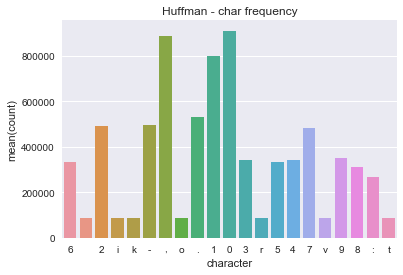

In [275]:
h = Huffman()
h.generate_code(get_file_char_stream(RUN_OR_WALK_REFORMAT_V1_PATH))
h.pprint_code()
count_plot_from_dict(h.get_char_count(), 'character', 'count', 'Huffman - char frequency')
h_1_uc, h_1_c, _ = h.print_compression_info_file(RUN_OR_WALK_REFORMAT_V1_PATH)
h_1_ratio = h_1_c*1. / h_1_uc

Finally, although we know that the Huffman coding is optimal, let's see how messing the dictionary code randomaly cause compression to be worth:

In [207]:
from random import shuffle

code = h.get_code()
keys = code.keys()[:]
values = code.values()[:]
shuffle(values)
h.set_code(dict(zip(keys, values)))
h.pprint_code()
h.print_compression_info_file(RUN_OR_WALK_REFORMAT_V1_PATH)
dummy=1


,charactter,ascii,code
0,6,54,101110
1,i,105,00010
2,k,107,110
3,\n,10,100
4,-,45,0011101
5,",",44,101111
6,o,111,1111
7,.,46,1010
8,1,49,0010
9,0,48,011


,uncompressed,compressed(without code),dictionary,ratio(without code),total ratio
0,60009600,35763272,438,0.595959,0.595966


(60009600, 35763272)

## Data set 2 - Mobile location history of 10/2014 
#### History of Locations of an android mobile in the month of October 2014.
https://www.kaggle.com/juliansimon/location-history

The dataset provided in json format and isn't tabular, means there are records that contains different numbers of fiels and lists. file size is 6149910 bytes (5.9M)

Examples:
1. 
   {                                                                                                                                                                      
     "timestampMs" : "1415045775364",                                                                                                                                        
     "latitudeE7" : 404213246,                                                                                                                                               
     "longitudeE7" : -36285327,                                                                                                                                              
     "accuracy" : 36                                                                                                                                                         
   }
2. {                                                                                                                                                                      
     "timestampMs" : "1415045715276",                                                                                                                                        
     "latitudeE7" : 404213284,                                                                                                                                               
     "longitudeE7" : -36285262,                                                                                                                                              
     "accuracy" : 36,                                                                                                                                                        
     "activitys" : [ {                                                                                                                                                       
       "timestampMs" : "1415045702461",                                                                                                                                      
       "activities" : [ {                                                                                                                                                    
         "type" : "unknown",                                                                                                                                                 
         "confidence" : 68                                                                                                                                                   
       }, {                                                                                                                                                                  
         "type" : "onBicycle",                                                                                                                                               
         "confidence" : 19                                                                                                                                                   
       }, {                                                                                                                                                                  
         "type" : "inVehicle",                                                                                                                                               
         "confidence" : 8                                                                                                                                                    
       }, {                                                                                                                                                                  
         "type" : "still",                                                                                                                                                   
         "confidence" : 6                                                                                                                                                    
       } ]                                                                                                                                                                   
     } ] 
    }

This format provides some hardness in reducing footprint by structure, because it isn't deterministic we can't just drop the key names (and some of the enumarated value names).  
However json format contains a lot of non semantic information spaces and line breaks suppose to make the data set easier to read by human beings. 
Before applying any fency compression we can easialy reduce data set size by give up the human readablity and trim all the fluffy characters. 
reading the data set and dump it again with python json package reduce the file size from 6149910 Bytes to 4865853 Bytes (0.79%), it becoming a one big line looking like that:
....{"latitudeE7": 404212492, "accuracy": 26, "longitudeE7": -36286189, "timestampMs": "1412114163888"}, {"latitudeE7": 404212787, "accuracy": 21, "longitudeE7": -36285734, "timestampMs": "1412114103956"}....

but the default dump still pad spaces after ':' and ',', so we can do better by drop it too (code below) that output data set file sized 4476978 Bytes (0.72%)

In [208]:
MOBILE_LOCATION_HISTORY_PATH = '../data_sets/mobileLocationHistory102014/location_history_102014.json'
MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH = '../modified_data_sets/mobileLocationHistory102014/location_history_102014_v1.json'

import json
if not os.path.isfile(MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH):
    with open(MOBILE_LOCATION_HISTORY_PATH, 'r') as fr:
        raw = json.loads(fr.read())
    with open(MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH, 'w') as outfile:
        json.dump(raw, outfile, separators=(',', ':'))


### Part 1 - Huffman Coding
Let's construct the Huffman Code, calculate the compressed size and plot the char count:

,uncompressed,compressed(without code),dictionary,ratio(without code),total ratio
0,35815824,21947999,1025,0.612802,0.61283


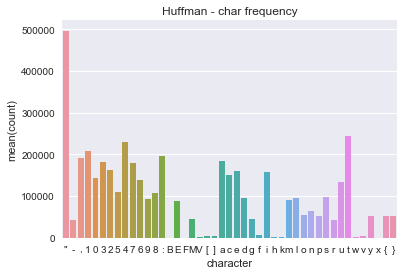

In [209]:
h = Huffman()
h.generate_code(get_file_char_stream(MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH))
h_2_uc, h_2_c, _ = h.print_compression_info_file(MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH)
h_2_ratio = h_2_c*1. / h_2_uc
count_plot_from_dict(h.get_char_count(), 'character', 'count', 'Huffman - char frequency')

One of the json format objectives is to be easy to read by human beings. but the cost is a lot of break line characters and space characters, as can be seen from the character count plot.

## Data set 3 - 2016 NYC Real Time Traffic Speed Data Feed  
The data contains 'real-time' traffic information from locations where NYCDOT picks up sensor feeds within the five boroughs of NYC, mostly on major arterials and highways. The data includes some meta fields such id, status, date and link id and the sensored data speed/travel time.

We works on april 2016 data set, which contains 1141384 records in csv format. Total size is 62972355 [Bytes] (60M).

Let's load the data and see the header and few lines. Also, as done in data set 1, we will remove the header line and '\r' character.

In [210]:
NYC_PATH = '../data_sets/nyc2016/april2016.csv'
NYC_REFORMAT_V1_PATH = '../modified_data_sets/nyc2016/april2016_v1.csv'

if not os.path.isfile(NYC_REFORMAT_V1_PATH):
    fw = open(NYC_REFORMAT_V1_PATH,'w')
    with open(NYC_PATH,'r') as fr:
        fr.readline()
        for l in fr.readlines():
            fw.write(l.replace('\r',''))
    fw.close()

df = pd.read_csv(NYC_PATH)
df.head()



,Id,Speed,TravelTime,Status,DataAsOf,linkId
0,169,57.17,162,0,4/1/2016 00:05:50,4616355
1,170,55.92,67,0,4/1/2016 00:05:50,4616356
2,171,14.91,807,0,4/1/2016 00:05:50,4616357
3,172,54.06,79,0,4/1/2016 00:05:50,4616310
4,177,54.06,80,0,4/1/2016 00:05:50,4616309


### Part 1 - Huffman Coding  

We will construct the Huffman Code, and calculate the compressed size. As the RunOrWalk data set it contains duplicate end EOL \r\n so we removing them.  
From looking on the char count we can see high frequency of the '"' character. reviewing the data set showing a lot of reserved quatation which wrap each cell number, In chapter 3 we will remove it.

,uncompressed[b],compressed(without code)[b],dictionary[b],neto ratio[b],total ratio[b]
0,394205624,191618798,348,0.486088,0.486089


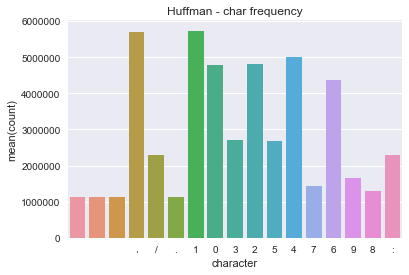

In [407]:
h = Huffman()
h.generate_code(get_file_char_stream(NYC_REFORMAT_V1_PATH))
h_3_uc, h_3_c, _ = h.print_compression_info_file(NYC_REFORMAT_V1_PATH)
h_3_ratio = h_3_c*1. / h_3_uc
count_plot_from_dict(h.get_char_count(), 'character', 'count', 'Huffman - char frequency')

## Clustered Huffman
### Motivation
The regular Huffman coding looks on the data set as unified source with constant character frequencies. Our assumption is that if we split our data sets to small enough partitions, there will be different characters frequencies. Such difference can occur due several reasons:  
1. rows with different labels: for example in runOrWalk maybe records labeled 'walk' contains more zeros on the accleration sensors compared to records labeled run.  
2. spatial locality: there are data sets where close records will contain similiar data, for exmaple in the NYC traffic sensors, the avarage cars speed change between hours on a day time  
3. correlation between columns of records: records may contains columns with have some correlation, for example in runOrWalk when records contains 'run' label we can assume that the gravity sensors on x and y axis contains higher values then the average.  
4. Unstructured data/semi structured data: when records fields doesn't determenistic there is higher probability to get different character frequency for different row. for example looking on our mobile json data set, there are records that contains extra keys/values information (as described on the first section of our work).  
5 .Seasonal/Trends data set: there are data sets which aren't stationary over time hence different partitions of such sets from different hours/days/month etc. will contains different character frequencies. 
6. random noise: in some parts, specially small parts, we will get frequency derive different Huffman code.  

With those assumption, our intent is to exploit this frequency variance across partitions and achieve better compression results by using multiple Huffman codes per data set. 

### Methods
Naive solution such Huffman code per block will fail due the fact that each dictionary need to be transmitted too and will cause hundered bits overhead for each partition, to cover this overhead we will need very big partitions size which decrease the variance between partitions (such naive method may success in seasonals data sets).  

Another more sophisticated approach will be to analyze the data set and take advantage of some feautures to  build several differemt Huffman codes and activate them according this analysis.  

A simple example would be our mobile location data set, this data set represented as json format where some records contains timestamp, latitude, longitude and accuracy, but some of the records contains extra fields with predefined set of keys. In this case construct two different Huffman dictionaries for each type of record would make sense.  


Although this approach can achieve good results, it have very big dis-adventage, it requires experts/heavy analysis and worth, it isn't generalized for specific set of rules, for example some data sets may have correlation between columns, some may decided by length of record (like our json example) and some may decided by time of record (seasonal).

### Clustered Huffman
#### Idea
We would like to propose a new method named Clustered Huffman compression, an unsupervised multiple Huffman codes compression algorithm that exploit the variance of character frequencies over data set and yet doesn't need expert per data set.    
In previous methods we used optimal Hufffman codes per partition. In our algorithm we compromise the optimal code per partition and instead choose "best" huffman code among given trees (soon the "best" will explained). 

#### Huffman codes construction
The Huffman trees built from running clustring algorithm over character frequencies that represent partitions samples taken from the data set.
The partitioning operation perform according partitioning_rules, for example each x characters, or each y line breaks.
The building phase return both the n_clusters huffman codes and the clusters estimator which will be used also in the encoding process.  
#### Encoding
In order to encode a data set we first divide the data set to partitions according partition_rules (described in previous paragraph). for each partition we estimate huffman tree and encode the partition with it. to the compressed data we need to add bits represnt the choosen huffman tree.
An important thing to emphasize is that the partitions_rules doesn't need to be same as the partition_rules used for the construction phase, for example, they may differ they may both different count of line breaks. In the experiment chapter we will try to understand if this flexability is really necessary.  

#### Decoding 
The decode performed by iterating over the encoded data, where first we read which Huffman tree to use, than decode with it till partition finished according given partition_rules, and repeat those two stages till all encoded data set decoded.
In this stage we do required to supply same partition_rules given in the encoding phase, that because we use this rule solely to understand when Huffman tree need to be switched.

#### Detailed algorithms:
1. **Build(data_set, n_clusters, partitioning_rules):**
  2.   get the full_character_set in the data_set
  3.   divide the data sets to partitions P according partitioning_rules
  4.   for each p_i in P construct s_i character frequency vector
  5.   for each s_i in S, for each character c appear on full_character_set and not in s_i, add to s_i {c:0.0}
  6.   run clustring algorithm on S and save n_clusters centroids C  
  7.   for each c in C construct Huffman codes H(c)  <br/>
8. **Encode(data_set, partitiong_rules):  **
  9.   divide the data sets to partitions P according partitioning_rules
  10.  for each p_i in P: 
    11.    construct s_i character frequency vector  
    12.    find closest centroid c from C
    13.    encode p_i with H(c) to en_p_i
    14.    add centroid c index concatinate with en_p_i to encode_data_set
  15.  return encode_data_set  <br/>
  
16. **Decode(encode_data_set, partitiong_rules):**
  17.  while didn't pass all encode_data_set:
    18.    read centroid index c from encode_data_set
    19.    add H(c) to decode_data_set until parititong_rules holds
  20.  return decode_data_set<br/>



In [353]:
import collections
import math
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display
import random

pd.options.display.max_columns = None


class ClusteredHuffman(object):
    
    def __init__(self, **kwargs):
        """
        params:
          sample_seperator: which event represent seperator between samples, 
                            if None, works in character level (for one liner data-sets such our reformatted json)
          batch_size: how many samples grouped to represent freq sample to the clustring algorithm
          stop_chars: chars to ignore/skip
        """
        self.sample_seperator = kwargs['sample_seperator']
        self.train_batch_size = kwargs['train_batch_size']
        assert self.train_batch_size > 0
        self.stop_chars = kwargs['stop_chars']
        self.n_clusters = kwargs['n_clusters']
        self.fill_missing_chars = kwargs['fill_missing_chars'] if 'fill_missing_chars' in kwargs else True
        self.data_set_is_file_path = kwargs['data_set_is_file_path'] if 'data_set_is_file_path' in kwargs else True
        self.verbose = kwargs['verbose'] if 'verbose' in kwargs else True
        self.train_fraction = kwargs['train_fraction'] if 'train_fraction' in kwargs else None
        
        self.est = None
        self.full_char_set = None
        self.h_arr = None
        self.train_labels_count = None
        self.cluster_bits_rep = math.ceil(math.log(self.n_clusters,2))
    
    def info(self, msg):
        if self.verbose is True:
            print msg
    
    def encode(self, data_set_file, batch_size):
        self.info('encode dataset...')
        
        #TODO: add dictionaries to the enccoding... (for the analysis we use compression_info_file)
        #for h in self.h_arr:
        #    huff_dicts += h.get_dict_size()
            
        clustr_bits = '{:0%sb}' % self.n_clusters
        encode_stream = ''
        for f, curr_chars in self._get_sample(self.get_data_stream(data_set_file), batch_size, True):
            label = int(self.est.predict(f.reshape(1,-1)))
            encode_stream += cluster_bits.format(label)
            encode_stream += self.h_arr[label].encode(curr_chars)

        self.info('done encoding!')
        return encode_stream
        
    
    def get_data_stream(self, data_set_file):
        if self.data_set_is_file_path:
            return itertools.chain.from_iterable(open(data_set_file))
        return data_set_file
    
    def get_dicts_size(self):
        huff_dicts = 0.
        for h in self.h_arr:
            huff_dicts += h.get_dict_size()
        return huff_dicts
    
    def compression_info_file(self, data_set_file, batch_size):
        self.info('calculate compression info...')
        uncompressed = 0
        compressed = 0
        huff_dicts = 0.
        for f, curr_chars in self._get_sample(self.get_data_stream(data_set_file), batch_size, True):
            label = int(self.est.predict(f.reshape(1,-1)))
            curr_uncomp, curr_comp, dict_size = self.h_arr[label].compression_info(curr_chars)
            uncompressed += curr_uncomp
            compressed += curr_comp + self.cluster_bits_rep
        huff_dicts = self.get_dicts_size()
        return compressed, uncompressed, huff_dicts
    
    def print_compression_info_file(self, data_set_file, batch_size):
        compressed, uncompressed, huff_dicts = self.compression_info_file(data_set_file, batch_size)
        header = ['uncompressed[b]', 'compressed[b]', 'dictionaries[b]', 'neto compression ratio', 'compression ratio']
        table = [[uncompressed, compressed, huff_dicts, compressed / uncompressed, (compressed + huff_dicts) / uncompressed]]
#         print 'uncompressed: %s, compressed(without codes): %s, codes: %s, ratio(without codes): %s, total ratio: %s' %(uncompressed, compressed, huff_dicts, compressed / uncompressed, (compressed + huff_dicts) / uncompressed)
        print_table(header, table)
        return compressed, uncompressed, huff_dicts
            
    
    def get_huffman_dicts_lengths(self):
        table = []
        table.append(self.full_char_set[:])
        for h in self.h_arr:
            c_len = [str(len(h.get_code()[c])) for c in self.full_char_set]
            table.append(c_len)
        return table
    
    def print_huffman_dicts_lengths(self):
        table = self.get_huffman_dicts_lengths()
        for row in table:
            print '%s' %(' '.join(row))
    
    def pprint_huffman_dicts_lengths(self):
        table = self.get_huffman_dicts_lengths()
        headers = table.pop(0)
        print_table(headers, table)
    
    def pprint_train_labels_count(self):
        headers = [i for i in range(len(self.train_labels_count))]
        print_table(headers, [self.train_labels_count])
    
    def build_codes(self, data_set_file):
        self.info('calculate full char set...')
        self.full_char_set = self._get_char_set(self.get_data_stream(data_set_file))
        self.info('build clustring samples...')
        cluster_samples = self._get_cluster_samples(self.get_data_stream(data_set_file), self.train_batch_size)
        if self.train_fraction is not None:
            self.info('#full sample size %s' % len(cluster_samples))
            cluster_samples = random.sample(cluster_samples, int(self.train_fraction * len(cluster_samples)))
        self.info('#samples: %s' % len(cluster_samples))
        self.info('clustring samples...')
        est = KMeans(n_clusters=self.n_clusters)
        self.est = est
        est.fit(cluster_samples)
        h_arr = []
        np.set_printoptions(precision=2)
        for i, c in enumerate(est.cluster_centers_):
#             print 'centroid %s: %s' % (i, c)
            freq_dict = {self.full_char_set[i]:c[i] for i in range(len(self.full_char_set))}
            h = Huffman(self.stop_chars)
            h.generate_code_from_freq_dict(freq_dict)
            h_arr.append(h)
        self.h_arr = h_arr
        self.info('huffman dicts code length comparrison:')
        if self.verbose:
                  self.pprint_huffman_dicts_lengths()

        labels = est.predict(cluster_samples)
        self.train_labels_count = []
        for i in range(self.n_clusters):
            self.train_labels_count.append(len([l for l in labels if l == i]))
        #print 'labels_count: %s' % self.train_labels_count
        if self.verbose:
                  self.pprint_train_labels_count()
    
    def get_train_labels_count(self):
        return self.train_labels_count
    
    def _get_cluster_samples(self, char_stream, batch_size):
        samples = []
        for f, _ in self._get_sample(char_stream, self.train_batch_size, False):
            samples.append(f)
        return samples
    
    def _get_sample(self, char_stream, batch_size, get_reminder):
        count = 0
        curr_batch = []
        for c in char_stream:
            if c in self.stop_chars:
                continue
            curr_batch.append(c)
            if c == self.sample_seperator or self.sample_seperator is None:
                count += 1
            if count == batch_size:
                freq_vec = self._get_freq(curr_batch)
                yield freq_vec, curr_batch
                count = 0
                curr_batch = []
                
        if get_reminder:
            if len(curr_batch) > 0:
                self.info('_get_sample fetched last partial sample length %s chars' % len(curr_batch))
                yield self._get_freq(curr_batch), curr_batch
                count = 0
                curr_batch = []
        else:
            if len(curr_batch):
                self.info('_get_sample drop last remainder sample length %s chars' % len(curr_batch))
            
    def _get_freq(self, char_stream):
        assert self.full_char_set is not None
        
        count_dict = dict(Counter(char_stream))
        for c in self.stop_chars:
            if c in count_dict:
                del count_dict[c]
        char_set = set([c for c in count_dict.keys()])
        if char_set != set(self.full_char_set):
            if self.fill_missing_chars:
                for c in self.full_char_set:
                    if c not in count_dict:
#                         print 'fill missing char %s in sample' % c
                        count_dict[c] = 0
            else:
                raise ValueError('need to support missing chars (maybe add some constant epsilon freq for those missings)')
        total = float(sum([v for v in count_dict.values()]))
        return np.array([count_dict[k] / total for k in self.full_char_set])
    
    def _get_char_set(self, char_stream):
        char_set = set()
        for c in char_stream:
            if c not in self.stop_chars:
                char_set.add(c)
        return list(char_set)


### Trade-offs 
There are several trade-off levels need to discussed:
1. First of all, the effectivity of this method rely on the variance of character frequencies between parttions. For very homogeneous data sets we may not find better solution than the single optimal Huffman code.
2. Construction partitions size can also affect, two big partition may smooth spike frequency variances and will reduce clustring impact. Two small cluster will may not fetch full length of phenomena and will also reduce clustring impact. 
3. Number of centroids effect on several things: 
  1. Number of huffman codes needed to be transmitted. this is a constant size and for very big data sets we can assume that it's effect will be neglible. 
  2. Each encoded partition prefixed with the centroid id, which is log(n_clusteres).
  3. For every data set there is the optimal number of clusteres, too less/much clusteres will cause to less effective compression.
4. encoding partition size can have same impact as the construction partition size limitation but add another trade-off, each partition include prefix with log(n_clusters) length, hence, for small partitions it will pay more prefix bits on total, and even for very distinct clusters it may be waste due low count of such clusteres.  
5. Complexity: perform clustring requires extra operation on the data. Optimal kmeans is NP Hard, and for fixed k clusteres, d (samples dimensions) is $O(n^{dk+1})$.  
However we used Lloyd algorithm which is $O(nkdi)$ where i represent converge iterations. consider our empirical typical parameters (d ~ 10-100,k ~ 8-64, i ~ 50-100) the clustring itself will take resources, but doesn't scale exponentialy and it is still practical.  
Encoding run time also perform more operations, each sample need to measure it distance for each centroid. The total complexity is $O(ndk)$ (refer to original complexity as $O(n)$) and was practicle in our setup (dk ~ 50-5000)


### Experiments
In this section we will evaluate the Clusteed huffman algorithm in several scenarios:
1. Run it on each of our modified data sets compared to the regular Huffman code.
2. Evaluate it on the data symbols of our LZ implementation on RunOrWalk data set and compare it to our GZIP implementation.

In [445]:
#some helper functions for the experiments
import os
import pickle

def evaluate_clustered_huffman(data_set_file, seperator, stopers, train_batch_sizes, n_cluster_sizes, encode_sizes, target_file, train_fraction=None):
    if os.path.isfile(target_file):
        with open(target_file, 'r') as fr:
            res = pickle.loads(fr.read())
            return res
    
    res = {}
    for train_size in train_batch_sizes:
        res[train_size] = {}
        for cluster_size in n_cluster_sizes:
            print 'building train_size: %s, n_cluster: %s' % (train_size, cluster_size)
            res[train_size][cluster_size] = {}            
            ch = ClusteredHuffman(sample_seperator=seperator, train_batch_size=train_size, stop_chars=stopers, n_clusters=cluster_size, fill_missing_chars=True, verbose=False, train_fraction=train_fraction)
            ch.build_codes(data_set_file)
            res[train_size][cluster_size]['train_labels_count'] = ch.get_train_labels_count()
            res[train_size][cluster_size]['huffman_lengths'] = ch.get_huffman_dicts_lengths()
            for encode_size in encode_sizes:
                print 'encoding encode_size: %s' % (encode_size)
                res[train_size][cluster_size][encode_size] = ch.compression_info_file(data_set_file, encode_size)
    with open(target_file, 'w') as fw:
        pickle.dump(res, fw)
    return res

def get_df_result(res):
    header = ['train_size', 'n_clusters', 'encode_size', 'neto compression ratio', 'compression ratio']
    table = []
    for ts in res.keys():
        for nc in res[ts].keys():
            for es in res[ts][nc].keys():
                if es != 'train_labels_count' and es != 'huffman_lengths':
                    nratio = res[ts][nc][es][0] / res[ts][nc][es][1]
                    ratio = (res[ts][nc][es][0] + res[ts][nc][es][2]) / res[ts][nc][es][1]
                    table.append([ts, nc, es, nratio, ratio])
    return pd.DataFrame(table, columns=header)
           
def print_df_result(res):
    pd.options.display.max_columns = None
    display(get_df_result(res))

def color_positive_green(val, pivot):
    color = 'green' if val < pivot else 'black'
    return 'color: %s' % color

def highlight_max(data, color='red'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

def highlight_min(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_max = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

def result_style_chain(res, pivot_val, **kwargs):
    apply_max = kwargs['apply_max'] if 'apply_max' in kwargs else True
    apply_min = kwargs['apply_min'] if 'apply_min' in kwargs else True
    min_idx = kwargs['min_idx'] if 'min_idx' in kwargs else 0
    max_idx = kwargs['max_idx'] if 'max_idx' in kwargs else 100000
    sorter = kwargs['sorter'] if 'sorter' in kwargs else 'neto compression ratio'
    styler = res.sort_values(sorter).iloc[min_idx:max_idx].style.applymap(lambda x: color_positive_green(x,pivot_val), subset=['neto compression ratio', 'compression ratio'])
    if apply_max:
        styler = styler.apply(highlight_max, subset=['neto compression ratio', 'compression ratio'])
    if apply_min:
        styler = styler.apply(highlight_min, subset=['neto compression ratio', 'compression ratio'])
    return styler



#### Expirement 1 - Clustered Huffman vs. regular Huffman code
##### Run Or Walk
We decided to seperate sample by line brealking sign. We run the clustered Huffman with cross between (train_size: 1,10,100,1000) x ( n_clusters: 2,4,8,16,32,64) x (encode size: 1,10,100,1000) total of 96 results from 96 parameter combinations. The clusters number choosed in order to utlilize all prefix bits on the encode data set.
The full table can be found on the appendix section

In [309]:
#exp 1 1
EXP_1_RUN_OR_WALK_RESULTS = '../output/experiments/exp1/exp1_run_or_walk_results.txt'
train_sizes = [1,10,100,1000]
n_cluster_sizes = [2,4,8,16,32,64]
encode_sizes = [1,10,100,1000]
run_or_walk_results = evaluate_clustered_huffman(RUN_OR_WALK_REFORMAT_V1_PATH, '\n', [], train_sizes, n_cluster_sizes, encode_sizes, EXP_1_RUN_OR_WALK_RESULTS)
#run_or_walk_df = get_df_result(run_or_walk_results).sort_values()

The regular Huffman achieved 0.506721 neto (without dict) compression ratio and 0.506728 total ratio.  
The best Clustered Huffman neto ratio achieved 0.505138 with parameters (train_size, n_clusteres, encode_size)=(100, 64, 100) which is 0.16% below the original.    
It is intersting in the top five results that 4 best results compression rates achieved with 64 clusteres, means the clusters really catched variance between samples character frequency, it may imply that we also needed to run 128 clustring.

In [280]:
result_style_chain(run_or_walk_df, h_1_ratio, apply_max=False, max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
73,100,64,100,0.505138,0.505606
49,10,64,100,0.505207,0.505674
1,1000,64,100,0.505213,0.505681
2,1000,64,1000,0.505241,0.505709
77,100,32,100,0.505278,0.505511


As described on the trade-offs we don't really bothered from the dictionary size for big data sets, but for small/medium data sets such ours it do have implication. when sorting according the total ratio we got best compression for parameters (100,32,100) and not even one results from the 64 clustring, and it emphazise the discussed trade-off.

In [281]:
result_style_chain(run_or_walk_df, h_1_ratio, apply_max=False, sorter='compression ratio', max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
77,100,32,100,0.505278,0.505511
5,1000,32,100,0.505295,0.505529
93,100,16,100,0.505439,0.505555
53,10,32,100,0.505335,0.505568
6,1000,32,1000,0.505348,0.505582


None of the worth five results was better than the regular Huffman code, all achieved with enocde_size=1, which demonstrate another trade off discussed, the price of paying extra 6 bit for each line is too high for this data set and loose more than it earns.

In [282]:
result_style_chain(run_or_walk_df, h_1_ratio, apply_min=False, min_idx=-5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
76,100,32,1,0.510835,0.511068
24,1,64,1,0.511145,0.511613
48,10,64,1,0.511671,0.512139
72,100,64,1,0.511917,0.512385
0,1000,64,1,0.511966,0.512434


We analized results from samples taken from full data set, we would like to see the influance of reduced sample size (10%) on the compression ratio.  
Our intuition told us that we going to get very bad results because it reduced the number of samples to 85 (almost same as the number of clusters). For our suprise it is still get better than the regular Huffman.


In [354]:
ch = ClusteredHuffman(sample_seperator='\n', stop_chars=[], train_batch_size=100, n_clusters=64, train_fraction=0.1, verbose=False)
ch.build_codes(RUN_OR_WALK_REFORMAT_V1_PATH)
ch.print_compression_info_file(RUN_OR_WALK_REFORMAT_V1_PATH, 100)
dummy = 1

,uncompressed[b],compressed[b],dictionaries[b],neto compression ratio,compression ratio
0,60009600,30326888.0,28084.0,0.505367,0.505835


##### Mobile location history of 10/2014
In this json data set we seperated the samples by '}' sign. From reviewing the data set we found that most of the reocrds come from same structure, but something like 10% contains additional keys/values. Our intuition tells us that small samples will catch this difference better.  
The Clustered Huffman run with cross between (train_size: 1,10,100,1000) x ( n_clusters: 2,4,8,16) x (encode size: 1,10,100,1000) total of 64 results from 64 parameter combinations. 
The full table can be found on the appendix section

In [311]:
#exp 1 2
EXP_1_MOBILE_LOCATION_RESULTS = '../output/experiments/exp1/exp1_mobile_location_results.txt'
train_sizes = [1,10,100,1000]
n_cluster_sizes = [2,4,8,16]
encode_sizes = [1,10,100,1000]
mobile_location_results = evaluate_clustered_huffman(MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH, '}', [], train_sizes, n_cluster_sizes, encode_sizes, EXP_1_MOBILE_LOCATION_RESULTS)
mobile_location_df = get_df_result(mobile_location_results)
#result_style_chain(mobile_location_df, h_2_ratio)

The semi-strucuted data set provides much better results due the big difference between records. Almost 90% of the combinations provided better results than regular Huffman coding (full table in appendix, better results are green)
The best results got 0.60634 neto compresion ratio which bites the regular Huffman code (0.612802) by more than 0.7%
The top results achieved with n_cluster=8 which is intersting and show discussed trade-off didn't seen before, too musch clusters may not fetch any important information and will just waist extra bits.

In [284]:
result_style_chain(mobile_location_df, h_2_ratio, apply_max=False, max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
16,1,8,1,0.60634,0.606587
20,1,16,1,0.607057,0.607557
28,1,4,1,0.607188,0.607312
37,2,16,2,0.60734,0.607812
33,2,8,2,0.607407,0.607642


Worth five results come from train_size=1 with bigger encode_size, showing that too big encoding partition may smooth learned frequencies and harm the compression.

In [285]:
result_style_chain(mobile_location_df, h_2_ratio, apply_min=False, min_idx=-5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
22,1,16,4,0.613621,0.614121
27,1,2,8,0.614537,0.614596
19,1,8,8,0.614847,0.615094
23,1,16,8,0.61521,0.61571
31,1,4,8,0.615312,0.615437


When coming to exmaine how 10% sample size affect results with best previouse parametersr, as opposed to RunOrWalk case, in this case we expect almost identical results because we cluster just with n_clusters=8 and we have much more sample size (5201 samples, batch_size=1).  
As expected (see below) The results are very good, better thean the second best results from the full data set.

In [356]:
ch = ClusteredHuffman(sample_seperator='}', stop_chars=[], train_batch_size=1, n_clusters=8, train_fraction=0.1, verbose=False)
ch.build_codes(MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH)
ch.print_compression_info_file(MOBILE_LOCATION_HISTORY_REFORMAT_V1_PATH, 1)
dummy = 1

,uncompressed[b],compressed[b],dictionaries[b],neto compression ratio,compression ratio
0,35815824,21721827.0,8866.0,0.606487,0.606734


##### 2016 NYC Real Time Traffic Speed Data Feed  
This data set have very similiar structure to the RunOrWalk data set so we expected similiar results. We used line breaking as seperator and same parameters as RunOrWalk.  
Due the fact that the data set is bigger than others by order, we decided to perform the clustring only on 10% of it.

In [457]:
#exp 1 3 
EXP_1_NYC_RESULTS = '../output/experiments/exp1/exp1_nyc_results.txt'
train_sizes = [1,10,100,1000]
n_cluster_sizes = [2,4,8,16,32,64]
encode_sizes = [1,10,100,1000]
nyc_results = evaluate_clustered_huffman(NYC_REFORMAT_V1_PATH, '\n', [], train_sizes, n_cluster_sizes, encode_sizes, EXP_1_NYC_RESULTS, train_fraction=0.1)
nyc_df = get_df_result(nyc_results)

As suspected, the results are also similiar to RunOrWalk data set results, best score achieved with 100 lines train/encode size with 64 clusters. The best neto score was 0.483825 lower by 0.22% (of uncompressed) refer to the regular Huffman. 

In [425]:
result_style_chain(nyc_df, h_3_ratio, apply_max=False, max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
73,100,64,100,0.483825,0.483881
49,10,64,100,0.483907,0.483964
1,1000,64,100,0.483967,0.484023
74,100,64,1000,0.484043,0.484099
77,100,32,100,0.484104,0.484132


This data set demonstrate in a very good way that we can neglect the constant price we paid for a lot of ditionaries in big data set. As can see below top results remains stable also if sort by the total compression ratio.

In [426]:
result_style_chain(nyc_df, h_3_ratio, apply_max=False, sorter='compression ratio', max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
73,100,64,100,0.483825,0.483881
49,10,64,100,0.483907,0.483964
1,1000,64,100,0.483967,0.484023
74,100,64,1000,0.484043,0.484099
77,100,32,100,0.484104,0.484132


Top Worth results achieved due learning representation of medium-long character samples and apply it to one line, which doesn't really catch any good represntation.

In [458]:
result_style_chain(nyc_df, h_3_ratio, apply_min=False, min_idx=-5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
4,1000,32,1,0.495311,0.495339
76,100,32,1,0.495663,0.495691
48,10,64,1,0.496706,0.496763
0,1000,64,1,0.497201,0.497258
72,100,64,1,0.497248,0.497304


#### Expirement 2 - Clustered Huffman Over LZ vs.  GZIP
In this part we took the compressed LZ output correspond to our best parameterized GZIP replaced the huffman encoding stage with out Clustered Huffman, and compare the results (full results of the experiment at the appendix).  
We are going to compress each channel (data, control, offset low/high, sequence length) with it's own parameters so before starting let's review the GZIP results per channel. As decribed earlier, offset low bits act randomally and the total size of Huffman on it is slightly worth then original (0.07% ~ 4[KB]).  
Best compression rate achieved on the length and data channel with ~35%,~45% compression ratio.

In [479]:
RUN_OR_WALK_LZ_PATH = '../output/lz_split_data_control/runOrWalk/runOrWalk_min_sequence6_max_sequencebits_8_window_sizebits_16/'
RUN_OR_WALK_LZ_CONTROL_PATH = RUN_OR_WALK_LZ_PATH + 'control.txt'
RUN_OR_WALK_LZ_DATA_PATH = RUN_OR_WALK_LZ_PATH + 'data.txt'
RUN_OR_WALK_LZ_LENGTH_PATH = RUN_OR_WALK_LZ_PATH + 'length.txt'
RUN_OR_WALK_LZ_OFFSET_HIGH_PATH = RUN_OR_WALK_LZ_PATH + 'offset_high.txt'
RUN_OR_WALK_LZ_OFFSET_LOW_PATH = RUN_OR_WALK_LZ_PATH + 'offset_low.txt'

def read_and_huff(path):
    with open(path, 'r') as fr:
        raw = fr.read()
        h = Huffman()
        h.generate_code(raw)
        res = h.print_compression_info(raw)
        return res[1] * 1. / res[0], (res[1] + res[2]) * 1. / res[0]

run_or_walk_data_ratio, run_or_walk_data_total_ratio = read_and_huff(RUN_OR_WALK_LZ_DATA_PATH)
run_or_walk_control_ratio, run_or_walk_control_total_ratio = read_and_huff(RUN_OR_WALK_LZ_CONTROL_PATH)
run_or_walk_offset_low_ratio, run_or_walk_offset_low_total_ratio = read_and_huff(RUN_OR_WALK_LZ_OFFSET_LOW_PATH)
run_or_walk_offset_high_ratio, run_or_walk_offset_high_total_ratio = read_and_huff(RUN_OR_WALK_LZ_OFFSET_HIGH_PATH)
run_or_walk_length_ratio, run_or_walk_length_total_ratio = read_and_huff(RUN_OR_WALK_LZ_LENGTH_PATH)
done=1

,uncompressed[b],compressed(without code)[b],dictionary[b],neto ratio[b],total ratio[b]
0,9207640,4278373,463,0.464655,0.464705


,uncompressed[b],compressed(without code)[b],dictionary[b],neto ratio[b],total ratio[b]
0,1801368,1678020,6302,0.931525,0.935024


,uncompressed[b],compressed(without code)[b],dictionary[b],neto ratio[b],total ratio[b]
0,5203256,5200790,6148,0.999526,1.000708


,uncompressed[b],compressed(without code)[b],dictionary[b],neto ratio[b],total ratio[b]
0,5203256,5109176,6198,0.981919,0.98311


,uncompressed[b],compressed(without code)[b],dictionary[b],neto ratio[b],total ratio[b]
0,5203256,1842442,559,0.354094,0.354201


Now let's evaluate channel by channel.  
One really important feature that we loose when performing Clustered Huffman after LZ is the fact that we can no longer rely on breaking line symbol or other symbols for partitioning due the fact that they might been squashed in the LZ compression and no longer represent natural structure seperator. Having saying that we will only count characters for partitioning in the evaluation.

##### LZ Data Channel

As mentioned before, we decided to run without any seperator (just character count) and set the parameters to (train_size: 100,1000,4000) x ( n_clusters: 2,4,8,16,32) x (encode size: 100,1000,4000).  
were really suprised to discover that all of the combination achieved better neto ratio than the regular huffman (see on the appendix).  
Best total score achieved with set of (1000,16,1000).

In [492]:
EXP_2_RUN_OR_WALK_DATA_RESULTS = '../output/experiments/exp2/exp2_run_or_walk_data_results.txt'
train_sizes = [100,1000,4000]
n_cluster_sizes = [2,4,8,16,32]
encode_sizes = [100,1000,4000]

run_or_walk_data_results = evaluate_clustered_huffman(RUN_OR_WALK_LZ_DATA_PATH, None, [], train_sizes, n_cluster_sizes, encode_sizes, EXP_2_RUN_OR_WALK_DATA_RESULTS)
run_or_walk_data_df = get_df_result(run_or_walk_data_results)

result_style_chain(run_or_walk_data_df, run_or_walk_data_total_ratio, sorter='compression ratio', apply_max=False, max_idx=5)



,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
3,1000,16,1000,0.461104,0.46192
0,1000,8,1000,0.461587,0.461995
12,1000,32,1000,0.460789,0.462422
15,4000,8,1000,0.462109,0.462512
18,4000,16,1000,0.461718,0.462522


##### LZ Control Channel
In this section we had another suprise, non parameter combination achieved better total ratio score than the regular huffman, we guess that is because the relative small data size which cause the dictionary size to influance score.  
We then tried several other combinations but weren't able to achieve better total compression ratio.

In [493]:
EXP_2_RUN_OR_WALK_CONTROL_RESULTS = '../output/experiments/exp2/exp2_run_or_walk_control_results.txt'
train_sizes = [20,100,1000]
n_cluster_sizes = [2,4,8,16]
encode_sizes = [20,100,1000]
run_or_walk_control_results = evaluate_clustered_huffman(RUN_OR_WALK_LZ_CONTROL_PATH, None, [], train_sizes, n_cluster_sizes, encode_sizes, EXP_2_RUN_OR_WALK_CONTROL_RESULTS)
run_or_walk_control_df = get_df_result(run_or_walk_control_results)
result_style_chain(run_or_walk_control_df, run_or_walk_control_total_ratio, apply_max=False, sorter='compression ratio', max_idx=5)



,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
8,1000,2,100,0.929076,0.936074
6,1000,2,1000,0.929086,0.936084
32,100,2,100,0.929289,0.936287
30,100,2,1000,0.929829,0.936828
18,20,2,1000,0.931057,0.938069


##### LZ Offset Low Channel
If we dissapointed from previous channel, for this one we arrived with lower expectations, that because we believe that the lower bits of offset are almost random and will always be worth with huffman code. the results didn'r susprised as...

In [481]:
EXP_2_RUN_OR_WALK_OFFSET_LOW_RESULTS = '../output/experiments/exp2/exp2_run_or_walk_offset_low_results.txt'
train_sizes = [20,100,1000]
n_cluster_sizes = [2,4,8,16]
encode_sizes = [20,100,1000]
run_or_walk_offset_low_results = evaluate_clustered_huffman(RUN_OR_WALK_LZ_OFFSET_LOW_PATH, None, [], train_sizes, n_cluster_sizes, encode_sizes, EXP_2_RUN_OR_WALK_OFFSET_LOW_RESULTS)
run_or_walk_offset_low_df = get_df_result(run_or_walk_offset_low_results)
result_style_chain(run_or_walk_offset_low_df, run_or_walk_offset_low_total_ratio, apply_max=False, sorter='compression ratio', max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
6,1000,2,1000,0.998741,1.00111
30,100,2,1000,0.998873,1.00124
32,100,2,100,0.999121,1.00149
8,1000,2,100,0.99917,1.00153
9,1000,4,1000,0.998068,1.0028


##### LZ Offset High Channel
For the offset high channel we got nice results, although the compression ratio is very poor there and ther is not a lot of juice to squeeze, we were able to achieved 0.1% less the regular Huffman code.

In [487]:
EXP_2_RUN_OR_WALK_OFFSET_HIGH_RESULTS = '../output/experiments/exp2/exp2_run_or_walk_offset_high_results.txt'
train_sizes = [20,100,1000]
n_cluster_sizes = [2,4,8,16]
encode_sizes = [20,100,1000]
run_or_walk_offset_high_results = evaluate_clustered_huffman(RUN_OR_WALK_LZ_OFFSET_HIGH_PATH, None, [], train_sizes, n_cluster_sizes, encode_sizes, EXP_2_RUN_OR_WALK_OFFSET_HIGH_RESULTS)
run_or_walk_offset_high_df = get_df_result(run_or_walk_offset_high_results)
result_style_chain(run_or_walk_offset_high_df, run_or_walk_offset_high_total_ratio, apply_max=False, sorter='compression ratio', max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
6,1000,2,1000,0.979771,0.982155
9,1000,4,1000,0.977394,0.982163
33,100,4,1000,0.978131,0.982898
30,100,2,1000,0.980706,0.983089
8,1000,2,100,0.980736,0.98312


##### LZ Length Channel
We really happy to find that last channel (length) Clustered Huffman compression bites the regular huffman (0.354201) and was almost %1 better.

In [495]:
EXP_2_RUN_OR_WALK_LENGTH_RESULTS = '../output/experiments/exp2/exp2_run_or_walk_length_results.txt'
train_sizes = [20,100,1000,4000]
n_cluster_sizes = [8,16,32]
encode_sizes = [20,100,1000,4000]
run_or_walk_length_results = evaluate_clustered_huffman(RUN_OR_WALK_LZ_LENGTH_PATH, None, [], train_sizes, n_cluster_sizes, encode_sizes, EXP_2_RUN_OR_WALK_LENGTH_RESULTS)
run_or_walk_length_df = get_df_result(run_or_walk_length_results)
result_style_chain(run_or_walk_length_df, run_or_walk_length_total_ratio, apply_max=False, sorter='compression ratio', max_idx=5)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
6,1000,16,1000,0.3427,0.344465
2,1000,8,1000,0.343657,0.344539
18,4000,16,1000,0.342788,0.344552
16,4000,16,4000,0.342976,0.344739
14,4000,8,1000,0.344156,0.345035


In [486]:
ch = ClusteredHuffman(sample_seperator=None, stop_chars=[], train_batch_size=500, n_clusters=4, verbose=True)
ch.build_codes(RUN_OR_WALK_LZ_OFFSET_HIGH_PATH)
ch.print_compression_info_file(RUN_OR_WALK_LZ_OFFSET_HIGH_PATH, 500)
dummy = 1

calculate full char set...
build clustring samples...
_get_sample drop last remainder sample length 407 chars
#samples: 1300
clustring samples...
huffman dicts code length comparrison:


, ,�,,�,,�,,�,,�,,�,,�,,�,,�,$,�,(,�,",",�,0,�,4,�,8,�,<,�,@,�,D,�,H,�,L,�,P,�,T,�,X,�,\,�,`,�,d,�,h,�,l,�,p,�,t,�,x,�,|,�,�,,�,,�,,�,,�,,�,,�,,�,,�,#,�,',�,+,�,/,�,3,�,7,�,;,�,?,�,C,�,G,�,K,�,O,�,S,�,W,�,[,�,_,�,c,�,g,�,k,�,o,�,s,�,w,�,{,�,,�,,�,,�,,�,,�,,�,,�,,�,,�,"""",�,&,�,*,�,.,�,2,�,6,�,:,�,>,�,B,�,F,�,J,�,N,�,R,�,V,�,Z,�,^,�,b,�,f,�,j,�,n,�,r,�,v,�,z,�,~,,�,,�,,�,,�,,�,,�,,�,,�,!,�,%,�,),�,-,�,1,�,5,�,9,�,=,�,A,�,E,�,I,�,M,�,Q,�,U,�,Y,�,],�,a,�,e,�,i,�,m,�,q,�,u,�,y,�,},�
0,4,8,6,8,7,8,7,8,7,8,7,8,7,9,8,8,7,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,6,8,7,9,7,9,7,8,7,8,7,9,7,9,7,9,7,9,8,9,8,9,8,9,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,8,7,9,7,9,7,9,7,8,7,8,7,8,7,9,7,8,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,6,8,7,8,7,9,7,9,7,9,7,8,7,9,8,8,7,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9
1,6,8,7,8,7,8,7,9,7,9,8,9,7,8,8,8,7,9,8,9,8,9,8,9,7,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,4,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,7,8,7,8,7,8,7,8,7,8,8,9,8,9,8,8,8,8,8,9,8,9,8,8,8,9,8,9,8,9,8,6,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,8,7,8,7,8,7,8,7,8,7,8,7,8,7,8,8,8,8,8,8,9,8,9,8,8,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,6,9,7,9,7,8,7,8,7,9,7,9,7,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9
2,6,8,7,8,7,8,7,8,7,8,7,9,7,8,8,8,7,8,8,9,8,8,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,9,9,8,9,8,9,8,9,8,7,8,7,8,7,9,7,9,7,8,8,8,8,8,8,9,8,8,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,8,7,9,7,8,7,8,7,8,7,8,7,8,7,8,7,8,8,9,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,7,8,9,8,9,8,9,8,9,8,9,8,9,8,9,4,9,8,9,8,9,8,9,8,9,8,9,8,9,8,6,8,7,8,7,8,7,8,7,9,7,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9
3,6,8,7,8,7,8,7,9,7,8,7,8,7,9,7,8,7,8,8,9,8,9,8,9,8,8,8,9,8,9,8,8,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,6,8,7,8,7,8,7,8,7,8,7,8,7,8,7,8,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,7,9,7,9,8,9,8,9,8,9,8,9,8,9,8,9,8,8,7,8,7,8,7,8,7,8,7,8,7,9,7,8,8,9,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,8,8,8,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9,8,6,8,7,8,7,8,7,8,7,8,7,8,7,9,8,8,7,8,8,9,8,9,8,9,8,9,8,9,8,9,8,8,8,8,8,8,8,9,8,9,8,9,8,9,8,9,8,9,6,9,8,9,8,9,8,9,8,9,8,9,8,9,8,9


,0,1,2,3
0,229,170,121,780


calculate compression info...
_get_sample fetched last partial sample length 407 chars


,uncompressed[b],compressed[b],dictionaries[b],neto compression ratio,compression ratio
0,5203256,5087215.0,24813.0,0.977698,0.982467


### Conclusions 
This is preliminary work and there is a lot of things can be done better or improved. several such directions:
1. Better dictionary compression against our not so sophisticated method to pass it as is.
2. Other Clustring algorithm than k-means that may perform better.
3. Explore different distance metrics: We used euclidian distance, which ignore character frequency level, for example feature with Xi=0.6 contribute to distance from centroid Y with Yi=0.7 same amount as Xj=0.1 contribute to centroid Z with Zj=0.0 but each one of them will may provide different compression ratio for that partition. One simple idea that come to mind (which we didn't explore) is instead using centroids of frequencies, use centroids that contains each character length and multiply it with the character count of the partiton.
4. Find an automated method to estimate good algorithm parameters for given data set such n_clusteres and train/encode batch size


### Appendix
#### Run or Walk Clustered Huffman results exp 1.

In [402]:
result_style_chain(run_or_walk_df, h_1_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
73,100,64,100,0.505138,0.505606
49,10,64,100,0.505207,0.505674
1,1000,64,100,0.505213,0.505681
2,1000,64,1000,0.505241,0.505709
77,100,32,100,0.505278,0.505511
5,1000,32,100,0.505295,0.505529
74,100,64,1000,0.505328,0.505796
53,10,32,100,0.505335,0.505568
6,1000,32,1000,0.505348,0.505582
78,100,32,1000,0.505415,0.505649


#### Mobile location history of 10/2014 Clustered Huffman results exp1.

In [424]:
result_style_chain(mobile_location_df, h_2_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
16,1,8,1,0.60634,0.606587
20,1,16,1,0.607057,0.607557
28,1,4,1,0.607188,0.607312
37,2,16,2,0.60734,0.607812
33,2,8,2,0.607407,0.607642
24,1,2,1,0.607443,0.607501
49,4,8,2,0.607855,0.608085
45,2,4,2,0.607869,0.607985
53,4,16,2,0.607934,0.608395
44,2,4,1,0.607996,0.608112


##### 2016 NYC Real Time Traffic Speed Data Feed  Clustered Huffman results exp1.

In [409]:
result_style_chain(nyc_df, h_3_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
73,100,64,100,0.483825,0.483881
49,10,64,100,0.483907,0.483964
1,1000,64,100,0.483967,0.484023
74,100,64,1000,0.484043,0.484099
77,100,32,100,0.484104,0.484132
5,1000,32,100,0.484164,0.484192
2,1000,64,1000,0.484164,0.484221
50,10,64,1000,0.484236,0.484292
78,100,32,1000,0.484294,0.484323
51,10,64,10,0.484303,0.48436


#### Run Or Walk Data Channel Clusttered Hufmman results exp2.

In [462]:
result_style_chain(run_or_walk_data_df, run_or_walk_data_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
12,1000,32,1000,0.460789,0.462422
27,4000,32,1000,0.461064,0.462686
3,1000,16,1000,0.461104,0.46192
42,100,32,1000,0.461464,0.463085
0,1000,8,1000,0.461587,0.461995
28,4000,32,4000,0.461684,0.463306
18,4000,16,1000,0.461718,0.462522
15,4000,8,1000,0.462109,0.462512
4,1000,16,4000,0.462155,0.462971
33,100,16,1000,0.462161,0.462973


#### Run Or Walk Control Channel Clusttered Hufmman results exp2.

In [461]:
result_style_chain(run_or_walk_control_df, run_or_walk_control_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
3,1000,16,1000,0.923786,0.984424
0,1000,8,1000,0.925462,0.958025
29,100,16,100,0.926459,0.996477
9,1000,4,1000,0.927357,0.945883
26,100,8,100,0.927422,0.963552
5,1000,16,100,0.928005,0.988643
2,1000,8,100,0.928091,0.960653
35,100,4,100,0.928477,0.942516
33,100,4,1000,0.928809,0.942848
8,1000,2,100,0.929076,0.936074


#### Run Or Walk Offset Low Channel Clusttered Hufmman results exp2.

In [482]:
result_style_chain(run_or_walk_offset_low_df, run_or_walk_offset_low_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
3,1000,16,1000,0.99694,1.01591
0,1000,8,1000,0.997188,1.00667
9,1000,4,1000,0.998068,1.0028
33,100,4,1000,0.998531,1.00326
24,100,8,1000,0.998656,1.00813
6,1000,2,1000,0.998741,1.00111
30,100,2,1000,0.998873,1.00124
29,100,16,100,0.999098,1.01805
32,100,2,100,0.999121,1.00149
8,1000,2,100,0.99917,1.00153


#### Run Or Walk Offset High Channel Clusttered Hufmman results exp2.

In [485]:
result_style_chain(run_or_walk_offset_high_df, run_or_walk_offset_high_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
3,1000,16,1000,0.973759,0.996823
0,1000,8,1000,0.974783,0.984318
15,100,16,1000,0.975403,0.994485
12,100,8,1000,0.976064,0.985604
16,100,16,100,0.976403,0.995486
1,1000,8,100,0.976989,0.986525
13,100,8,100,0.97725,0.98679
9,1000,4,1000,0.977394,0.982163
4,1000,16,100,0.977504,1.00057
21,100,4,1000,0.978131,0.982898


#### Run Or Walk Length Channel Clusttered Hufmman results exp2.

In [496]:
result_style_chain(run_or_walk_length_df, run_or_walk_length_ratio)

,train_size,n_clusters,encode_size,neto compression ratio,compression ratio
10,1000,32,1000,0.341489,0.345045
22,4000,32,1000,0.341989,0.345539
20,4000,32,4000,0.341992,0.345542
6,1000,16,1000,0.3427,0.344465
18,4000,16,1000,0.342788,0.344552
16,4000,16,4000,0.342976,0.344739
8,1000,32,4000,0.343137,0.346693
34,100,32,1000,0.343512,0.347038
2,1000,8,1000,0.343657,0.344539
30,100,16,1000,0.344092,0.345854
